In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
from utils import plot_loss_histories_one_plot_log, run_experiment, plot_accuracies, get_dataset, test_and_plot_parameters

## Generated dataset


In [2]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)

In [3]:
_, loss_histories, optimal_params = run_experiment(X_train, y_train, iter_=1)
pd.DataFrame(optimal_params)

,COBYLA
Minimum loss,68.877808
Optimal b,-0.039794
Optimal n,"[-2.6595150006012793e-19, 0.15295803003933733,..."
Optimal p,"[-1.7670468075285577e-19, 1.5036974806010507e-..."
Optimal w,"[-8.924681930727216e-20, 0.15295803003933733, ..."


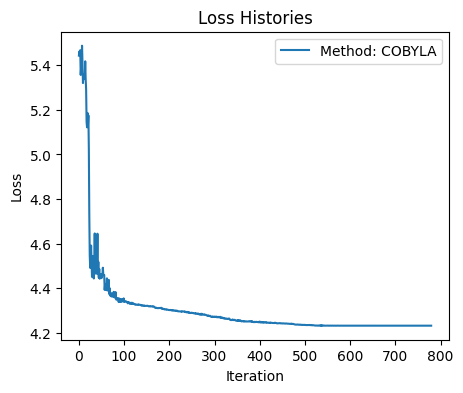

In [4]:
plot_loss_histories_one_plot_log(loss_histories)

## UCI Dataset

### Breast Cancer Wisconsin Diagnostic

In [5]:
X_BC, y_BC = get_dataset(17, 'M', 'B')

In [6]:
_, loss_histories, optimal_params = run_experiment(X_BC, y_BC, iter_=1)
pd.DataFrame(optimal_params)

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)


,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.1177885413732276e-16, -9.685915560768156e-...","[8.085784925330267e-14, 5.2090428715062e-14, 7..."
Optimal p,"[0.0, 0.04573806857521944, 0.0, 0.0, 0.0, 0.0,...","[0.282929890797495, -4.85722573273506e-17, -6....","[9.915732666961261e-14, 0.04634322681951134, 8..."
Optimal w,"[0.0, -0.04573806857521944, 0.0, 0.0, 0.0, 0.0...","[-0.2829298907974951, -4.828689828033096e-17, ...","[-1.829947741630994e-14, -0.04634322681945925,..."
Optimal b,0.649199,0.621903,0.649203
Minimum loss,14.686684,14.774365,14.686685


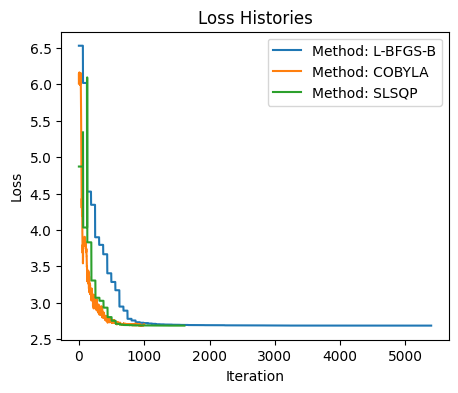

In [7]:
plot_loss_histories_one_plot_log(loss_histories)

### Banknote Authentication

In [8]:
X_BA, y_BA = get_dataset(267, 0, 1)

In [9]:
_, loss_histories, optimal_params = run_experiment(X_BA, y_BA, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0]","[-9.616755476372979e-20, -9.616927882775295e-2...","[0.0, 0.0, 0.0, 0.0]"
Optimal p,"[3.4795018055591473, 3.462967863413182, 3.0388...","[3.479457191734234, 3.462738263216719, 3.03868...","[3.4795709304064917, 3.4627857253351486, 3.038..."
Optimal w,"[-3.4795018055591473, -3.462967863413182, -3.0...","[-3.479457191734234, -3.462738263216719, -3.03...","[-3.4795709304064917, -3.4627857253351486, -3...."
Optimal b,-0.853927,-0.853872,-0.854018
Minimum loss,17.033157,17.033157,17.033157


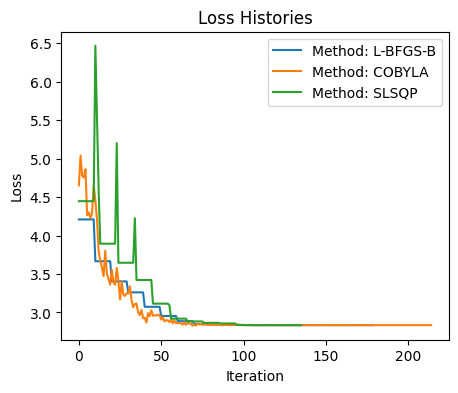

In [10]:
plot_loss_histories_one_plot_log(loss_histories)

### Spambase

In [11]:
X_S, y_S = get_dataset(94, 0, 1)

In [12]:
_, loss_histories, optimal_params = run_experiment(X_S, y_S, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.037363784937685614, 0.04218704043...","[0.5136973243140621, 2.7755575615628914e-17, 0...","[2.908895194818022e-13, 1.7139285432383247e-13..."
Optimal p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1220633084726583, -5.273559366969494e-16, 1...","[1.330540462752591e-13, 7.120243032741375e-14,..."
Optimal w,"[0.0, 0.0, 0.037363784937685614, 0.04218704043...","[-0.6083659841585962, 5.551115123125783e-16, -...","[1.578354732065431e-13, 1.0019042399641872e-13..."
Optimal b,-0.580024,-2.562479,-0.579952
Minimum loss,35.043239,163.388774,35.043239


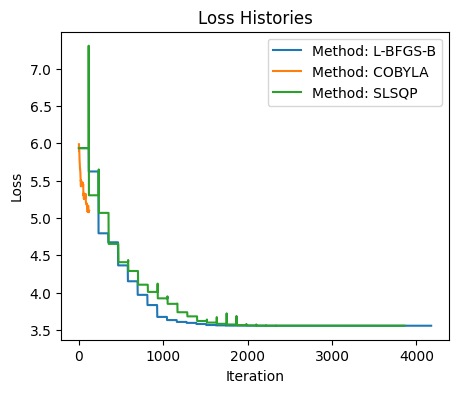

In [13]:
plot_loss_histories_one_plot_log(loss_histories)

### Compare the methods

In [14]:
accuracies_breast_cancer, loss_histories_breast_cancer, optimal_params_breast_cancer = run_experiment(X_BC, y_BC)
accuracies_banknote, loss_histories_banknote, optimal_params_banknote = run_experiment(X_BA, y_BA)
accuracies_spambase, loss_histories_spambase, optimal_params_spambase = run_experiment(X_S, y_S)

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/User

In [15]:
all_accuracies = {
    'Breast Cancer': accuracies_breast_cancer,
    'Banknote': accuracies_banknote,
    'Spambase': accuracies_spambase
}

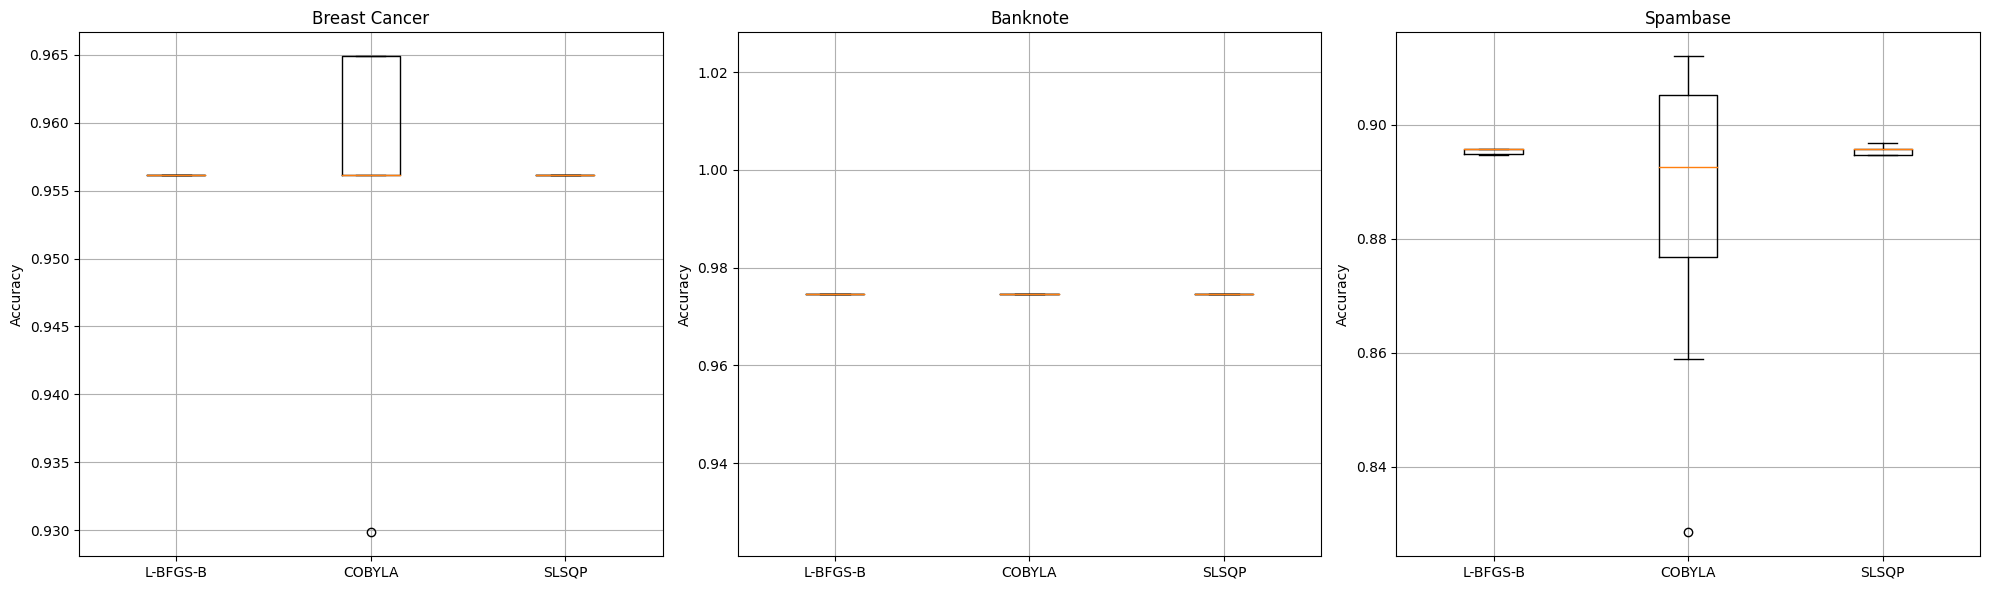

In [16]:
plot_accuracies(all_accuracies)

### Fine-tuning the parameters - Banknote Authentication

In [17]:
params = {
    'L-BFGS-B': {
        'maxiter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600],
        'ftol': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
        'gtol': [0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.0000001]
    },
    'COBYLA': {
        'maxiter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600],
        'rhobeg': [0.1, 0.3, 0.5, 0.7, 1.0],
        'catol': [0.1, 0.001, 0.00001, 0.0000001]
    },
    'SLSQP': {
        'maxiter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600],
        'ftol': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
        'eps': [0.1, 0.3, 0.5, 0.7, 1.0]
    }
}

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:27: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n - p) + b)))) + np.sum(n + p)
/User

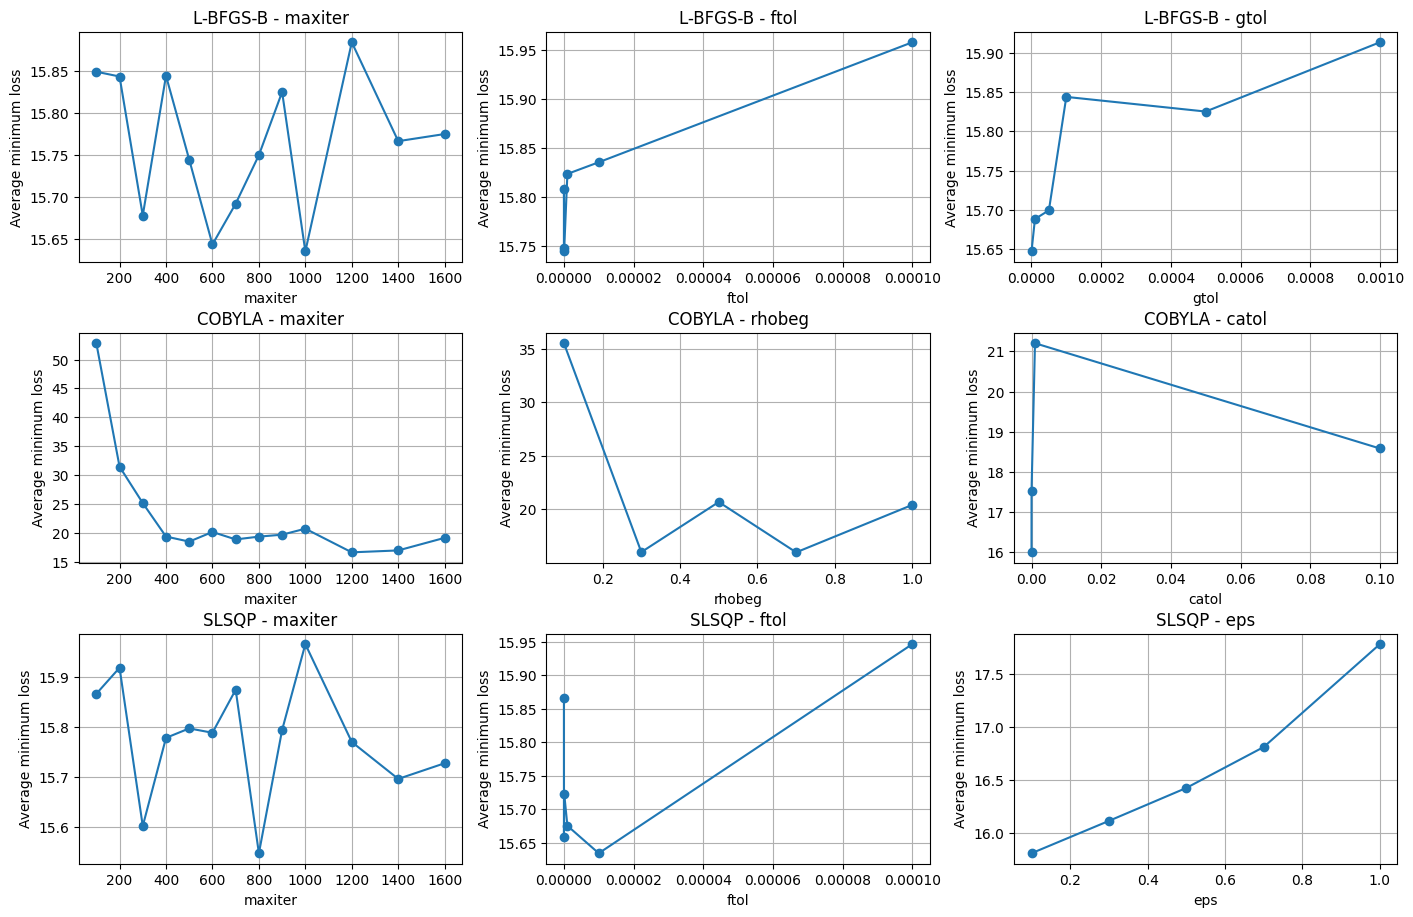

In [18]:
test_and_plot_parameters(X_BC, y_BC, params, iter_=50)